# LDA MODELLING FOR ALL DATA

In [1]:
# Import Packages
from imp import reload
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tool_functions import *
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

/home/kyle/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Data Extraction

In [ ]:
funding = MySQLPipline(database='funding')

In [ ]:
NSFdata = funding.NSFDataset()
NSFdata["institution"] = ["NSF"] * NSFdata.shape[0]

In [ ]:
NIHdata = funding.NIHDataset()
NIHdata["institution"] = ["NIH"] * NIHdata.shape[0]

In [ ]:
ERCdata = funding.ERCDataset()
ERCdata["institution"] = ["ERC"] * ERCdata.shape[0]

In [ ]:
UKRIdata = funding.UKRIDataset()
UKRIdata["institution"] = ["UKRI"] * UKRIdata.shape[0]

In [ ]:
funding.close_Conn()

In [ ]:
df1 = pd.concat([NIHdata[["title", "abstract", "institution"]],
                ERCdata[["title", "abstract", "institution"]]])
df2 = pd.concat([NSFdata[["title", "abstract", "institution"]],
                UKRIdata[["title", "abstract", "institution"]]])
df = pd.concat([df1, df2])
df.reset_index(drop=True, inplace=True)

# Data Processing

In [9]:
pp = preprocessor(dataset = df)

In [10]:
pp.remove_abstract(regex=r'Abstracts are not currently available in GtR').reset_index(drop = True, inplace = True)
pp.remove_abstract(regex=r'No abstract available').reset_index(drop = True, inplace = True)

In [11]:
pp.dataset = pp.dataset[~pd.isna(pp.dataset.title)]
pp.reset_index()

In [12]:
pp.clean_text()

This may take long time to run...
Finished! It takes 74.83084011077881 seconds to run.


,title,abstract,institution
0,Novel Treatments for Ocular Surface Diseases,PROJECT DESCRIPTION ABSTRACT Dry eye disease D...,NIH
1,SYNTHETIC GENE CIRCUITS FOR MONITORING T CELL ...,Chimeric antigen receptor CAR T cell therapy h...,NIH
2,Training Program in Cancer Biology,Project Summary The Icahn School of Medicine a...,NIH
3,Understanding the influence of bone metastatic...,While immunotherapies have made strides in the...,NIH
4,Modeling bladder cancer pathogenesis and tumor...,Project Summary Abstract This new Program Proj...,NIH
...,...,...,...
173210,Work of Words Re reading the poetry of Dylan ...,This project is the first to systematically ap...,UKRI
173211,Surface rupture in the 12 May 2008 Sichuan ear...,The May earthquake in Sichuan Province China h...,UKRI
173212,Influences on negotiating clinical need amp ...,This study examines how patients and dentists ...,UKRI
173213,DiRAC2 100 Tflop s HPC cluster procurement,This award covers the capital cost of procurin...,UKRI


In [13]:
pp.reset_index()

In [14]:
df_cleaned = pp.dataset

In [15]:
%store df_cleaned

Stored 'df_cleaned' (DataFrame)


In [21]:
pp.dataset.to_csv("../Data/cleanData.csv", index = False)

In [2]:
df_cleaned = pd.read_csv("../Data/cleanData.csv")

# LDA Model Creating

In [3]:
# df = pd.read_csv("../Data/cleaned_data.csv", encoding = "utf-8-sig")

In [24]:
# %store -r df_cleaned

In [5]:
pp = preprocessor(dataset = df_cleaned)

In [6]:
def get_tfidf(docList):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(docList)
    feature_names = vectorizer.get_feature_names()
    dense = vectors.todense()
    denselist = dense.tolist()
    tfidf = pd.DataFrame(denselist, columns=feature_names)
    return tfidf

In [7]:
pp.remove_stop_words()

Finished! It takes 13.277737855911255 seconds to run.


,title,abstract,institution,corpus
0,Novel Treatments for Ocular Surface Diseases,PROJECT DESCRIPTION ABSTRACT Dry eye disease D...,NIH,"[dry, eye, disease, ded, ocular, surface, dise..."
1,SYNTHETIC GENE CIRCUITS FOR MONITORING T CELL ...,Chimeric antigen receptor CAR T cell therapy h...,NIH,"[chimeric, antigen, receptor, car, cell, thera..."
2,Training Program in Cancer Biology,Project Summary The Icahn School of Medicine a...,NIH,"[icahn, school, medicine, mount, sinai, propos..."
3,Understanding the influence of bone metastatic...,While immunotherapies have made strides in the...,NIH,"[immunotherapies, strides, treatment, cancers,..."
4,Modeling bladder cancer pathogenesis and tumor...,Project Summary Abstract This new Program Proj...,NIH,"[investigate, molecular, mechanisms, underlyin..."
...,...,...,...,...
173210,Work of Words Re reading the poetry of Dylan ...,This project is the first to systematically ap...,UKRI,"[systematically, apply, modern, critical, theo..."
173211,Surface rupture in the 12 May 2008 Sichuan ear...,The May earthquake in Sichuan Province China h...,UKRI,"[earthquake, sichuan, province, china, magnitu..."
173212,Influences on negotiating clinical need amp ...,This study examines how patients and dentists ...,UKRI,"[patients, dentists, decide, pursue, treatment..."
173213,DiRAC2 100 Tflop s HPC cluster procurement,This award covers the capital cost of procurin...,UKRI,"[award, covers, capital, cost, procuring, tflo..."


In [8]:
df_noStopWords = pp.dataset
%store df_noStopWords

Stored 'df_noStopWords' (DataFrame)


# Stemming and Lemmatization

In [9]:
# %store -r df_noStopWords
# pp = nlp_ldamodel.preprocessor(dataset = df_noStopWords)

In [11]:
pp.reset_index()

In [12]:
pp.word_stemmer(getSet = True)

start stemming...
Stemming finished! Stemming takes 646.9430975914001 seconds to run


,title,abstract,institution,corpus,corpus_stemmed,corpusSet
0,Novel Treatments for Ocular Surface Diseases,PROJECT DESCRIPTION ABSTRACT Dry eye disease D...,NIH,"[dry, eye, disease, ded, ocular, surface, dise...","[dri, eye, diseas, ded, ocular, surfac, diseas...","{palli, data, signific, commonli, result, indu..."
1,SYNTHETIC GENE CIRCUITS FOR MONITORING T CELL ...,Chimeric antigen receptor CAR T cell therapy h...,NIH,"[chimeric, antigen, receptor, car, cell, thera...","[chimer, antigen, receptor, car, cell, therapi...","{d2r, thymidin, candid, link, singl, pet, indu..."
2,Training Program in Cancer Biology,Project Summary The Icahn School of Medicine a...,NIH,"[icahn, school, medicine, mount, sinai, propos...","[icahn, school, medicin, mount, sinai, propos,...","{member, importantli, benefit, aid, impart, in..."
3,Understanding the influence of bone metastatic...,While immunotherapies have made strides in the...,NIH,"[immunotherapies, strides, treatment, cancers,...","[immunotherapi, stride, treatment, cancer, cas...","{analyz, importantli, optimum, significantli, ..."
4,Modeling bladder cancer pathogenesis and tumor...,Project Summary Abstract This new Program Proj...,NIH,"[investigate, molecular, mechanisms, underlyin...","[investig, molecular, mechan, underli, pathoge...","{analyz, elucid, pursu, bt, univers, defin, tz..."
...,...,...,...,...,...,...
173210,Work of Words Re reading the poetry of Dylan ...,This project is the first to systematically ap...,UKRI,"[systematically, apply, modern, critical, theo...","[systemat, appli, modern, critic, theori, bodi...","{develop, evolut, poem, grotesqu, thoma, noteb..."
173211,Surface rupture in the 12 May 2008 Sichuan ear...,The May earthquake in Sichuan Province China h...,UKRI,"[earthquake, sichuan, province, china, magnitu...","[earthquak, sichuan, provinc, china, magnitud,...","{run, remot, ruptur, rug, check, long, interac..."
173212,Influences on negotiating clinical need amp ...,This study examines how patients and dentists ...,UKRI,"[patients, dentists, decide, pursue, treatment...","[patient, dentist, decid, pursu, treatment, in...","{person, clinician, provid, involv, exist, pri..."
173213,DiRAC2 100 Tflop s HPC cluster procurement,This award covers the capital cost of procurin...,UKRI,"[award, covers, capital, cost, procuring, tflo...","[award, cover, capit, cost, procur, tflop, hpc...","{procur, cluster, leicest, award, facil, cover..."


In [13]:
df_stemmed = pp.dataset
%store df_stemmed

Stored 'df_stemmed' (DataFrame)


In [14]:
all_corpus = pp.getAllCorpus(colname = 'corpus_stemmed')

In [15]:
len(all_corpus)

35129079

In [16]:
len(set(all_corpus))

246256

# LDA Model Creation

In [18]:
# %store -r df_stemmed
# pp = nlp_ldamodel.preprocessor(dataset = df_stemmed)

In [19]:
words, dic, corpus = pp.get_corpus()

In [20]:
m = nlp_ldamodel(words, dic, corpus)

In [21]:
m.LDA_Model(30, 100)
m.LDA_Visualisation()

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
27     0.205549 -0.102503       1        1  11.026878
2      0.219660 -0.046232       2        1  10.037456
15     0.138742  0.014689       3        1   6.820676
24     0.198698  0.000373       4        1   6.711232
13    -0.003650 -0.005253       5        1   6.228593
7      0.171917 -0.105956       6        1   6.187648
21     0.054932  0.189555       7        1   5.193580
6      0.140857  0.105123       8        1   5.170205
10    -0.077793  0.189627       9        1   4.837727
8      0.132099 -0.092123      10        1   4.643390
5      0.047152  0.065333      11        1   3.738357
1     -0.041971  0.102346      12        1   3.301821
0      0.175181 -0.056432      13        1   3.126055
9      0.094683  0.084747      14        1   2.846355
3     -0.066834  0.192679      15        1   2.434450
29    -0.060855 -0.002613      16        1   2.383467
17    -0.030600  0.039615      17        1   2.312748
22    -0.043337  0.056725      18        1   2.141686
19    -0.019243  0.163992      19        1   2.001594
28    -0.078724  0.021194      20        1   1.370281
14     0.005412 -0.065697      21        1   1.329282
18    -0.135606  0.041056      22        1   0.997738
16     0.033921 -0.205051      23        1   0.949868
12    -0.136668 -0.153882      24        1   0.817555
20    -0.104157 -0.014384      25        1   0.803488
4     -0.160889 -0.025494      26        1   0.663672
26    -0.200282  0.027232      27        1   0.567287
11    -0.069760 -0.157705      28        1   0.554748
25    -0.137526 -0.101222      29        1   0.460720
23    -0.250910 -0.159739      30        1   0.341440, topic_info=          Term           Freq          Total Category  logprob  loglift
102       cell  371072.000000  371072.000000  Default  30.0000  30.0000
141       gene  118039.000000  118039.000000  Default  29.0000  29.0000
580    protein  136367.000000  136367.000000  Default  28.0000  28.0000
437     signal   68868.000000   68868.000000  Default  27.0000  27.0000
1380     brain   89594.000000   89594.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
2788  recombin    2061.367896    5059.351444  Topic30  -4.0637   4.7819
769      break    2616.051627    9336.801510  Topic30  -3.8254   4.4075
7748      lock    1205.196126    1970.331898  Topic30  -4.6004   5.1882
2123      poli     892.913822    1315.442710  Topic30  -4.9003   5.2923
707      doubl     828.751906    4830.147648  Topic30  -4.9749   3.9170

[2096 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
4388      28  0.998585    1970
11765      8  0.000650      ab
11765      9  0.003251      ab
11765     12  0.000650      ab
11765     26  0.815433      ab
...      ...       ...     ...
3816      21  0.080893    zone
3816      22  0.013857    zone
3816      23  0.665333    zone
3816      27  0.031353    zone
3513      23  0.996824  zoonot

[10679 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[28, 3, 16, 25, 14, 8, 22, 7, 11, 9, 6, 2, 1, 10, 4, 30, 18, 23, 20, 29, 15, 19, 17, 13, 21, 5, 27, 12, 26, 24])

In [22]:
m.LDA_Model(18, 100)
m.LDA_Visualisation()

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.210115  0.126945       1        1  12.186035
14     0.195085 -0.008688       2        1  11.863363
2      0.114799  0.119086       3        1   8.581512
4      0.106178  0.201603       4        1   7.737160
15    -0.199523 -0.091985       5        1   6.887737
6      0.003218 -0.042539       6        1   6.557072
5     -0.083280 -0.129065       7        1   5.512523
8      0.041379 -0.184724       8        1   5.358481
1      0.148843 -0.040424       9        1   5.353379
7      0.082619  0.019163      10        1   5.194102
0     -0.227133  0.104442      11        1   4.386531
9     -0.067923 -0.130162      12        1   4.038280
11     0.054935  0.006168      13        1   3.818441
17    -0.144016  0.075437      14        1   3.207126
16     0.072890 -0.182700      15        1   3.085535
13    -0.006565 -0.097944      16        1   2.623272
12    -0.167931  0.137828      17        1   1.838080
3     -0.133689  0.117558      18        1   1.771371, topic_info=         Term           Freq          Total Category  logprob  loglift
102      cell  316268.000000  316268.000000  Default  30.0000  30.0000
141      gene  120171.000000  120171.000000  Default  29.0000  29.0000
16     diseas  172107.000000  172107.000000  Default  28.0000  28.0000
580   protein  136516.000000  136516.000000  Default  27.0000  27.0000
58    patient   92909.000000   92909.000000  Default  26.0000  26.0000
...       ...            ...            ...      ...      ...      ...
799     popul    3912.515305   43737.476799  Topic18  -5.0692   1.6194
1515     anim    3893.290245   53914.561882  Topic18  -5.0741   1.4053
204   respons    4205.780694  110106.597817  Topic18  -4.9969   0.7684
224      test    3774.499795   87845.251577  Topic18  -5.1051   0.8861
15    develop    4211.498923  335561.792659  Topic18  -4.9955  -0.3446

[1420 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
4388      18  0.999033      1970
12273     17  0.999282      1980
7197      12  0.999373      19th
15621     16  0.995263        1d
9102       2  0.997148  abstract
...      ...       ...       ...
3816      16  0.047326      zone
3816      18  0.002516      zone
12311     18  0.993665      zoom
3513       1  0.002727    zoonot
3513      10  0.995201    zoonot

[6342 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 15, 3, 5, 16, 7, 6, 9, 2, 8, 1, 10, 12, 18, 17, 14, 13, 4])

In [ ]:
themes = [
    "graduate education",
    "sensor techonology",
    "Economics"
    "immunology",
    "materials science",
    "universal field theory (phyics)",
    "Protein Structure",
    "population genetics",
    "brain structure and disease",
    "heart disease",
    "social science and welfare",
    "environmental policy",
    "health / oncology",
    "Epidemiology",
    "carbon markets",
    "soil biology",
]

In [8]:
# themes = [
#     "graduate education",
#     "sensor techonology",
#     "Economics"
#     "immunology",
#     "materials science",
#     "universal field theory (phyics)",
#     "Protein Structure",
#     "population genetics",
#     "brain structure and disease",
#     "heart disease",
#     "social science and welfare",
#     "environmental policy",
#     "health / oncology",
#     "Epidemiology",
#     "carbon markets",
#     "soil biology",
# ]

In [9]:
mp.add_themes(themes=themes)

# LDA Model Prediction

In [11]:
#  predicting new text which is in text dataframe  
unseen_abstract = """
MAP aims to provide a comparative approach on the use of interdisciplinary arts-based practices for peacebuilding in Kyrgyzstan, Rwanda, Indonesia and Nepal. 
MAP has the overall goals of first, influencing curricula and approaches to working with in- and out-of-school youth and second, creating structures and modes of 
communication between youth and policymakers from the local to global. Each country has different histories and approaches to peacebuilding, yet all four have a 
rich tradition of using cultural forms for dialogue. The selection of the four countries will enable us to explore how pathways to peace may be shaped by diverse 
political, cultural, religious and linguistic factors, as well as the crosscutting issues of gender and intersecting inequalities, environments and the exclusion 
of children and youth from policymaking processes. 

MAP will operate across three core components: a) project design and delivery; b) research; and c) arts-based practice that run throughout three strands of activities. 
Strand One will involve scoping visits, literature reviews, community mapping and training of adult and child/youth facilitators in arts-based methods for dialogue and research.
During Strand Two, up to 3 small grants of &amp;pound;5,000 will be awarded in each of the four countries for child/youth and adult MAP trainers to work alongside CSOs to 
develop projects that address local issues that may incorporate (but are not limited to): child rights-based decision-making; child protection and peacebuilding. 
Up to 2 grants of &amp;pound;29,500 in each of the four countries for youth to work alongside policy-focused organisations to explore arts-based communication structures. 
Up to 4 large grants of &amp;pound;100,000 in each of the four countries for researchers of any level and partnering organisations to design and deliver effective monitoring, 
evaluation and impact delivery alongside the small and mid-size grant awardees. One additional large grant of &amp;pound;100,000 will be awarded in the final two years of the 
project to synthesize findings, drawing out similarities and divergences across the four countries and to consider questions of scalability and transferability, in order to 
inform youth policy at an international level. Strand Three will involve the coordination of community-based dialogue groups and MAP Clubs to inform policy and establish 
communication structures alongside synthesis and dissemination. The project will be working alongside cultural organisations, youth-serving CSOs, conflict and peace building 
CSOs, government institutions and ministries, higher education institutions, conflict management, and psychosocial wellbeing organisations. In this way, the project promises 
diverse impact at local, national and international levels. 

We will explore the following questions:

1. How can different art forms be used to co-design, deliver and evaluate peacebuilding curricula and other approaches for working with children and youth to address local conflict issues?
2. How might cultural forms be used for dialogue with and between children and youth, educators and policy makers to advance peacebuilding through a local and indigenous approach?
3. How might psychosocial support, including local healing practices, be better integrated within peacebuilding approaches by using the arts to promote the wellbeing of children and youth, especially 
those from marginalised groups? 
4. How can cultural forms be incorporated into child- and youth-led participatory action research methodologies and adapted for the purposes of the design, undertaking and delivery of interdisciplinary 
projects in diverse social, political and cultural contexts?
5. How might these cultural forms be used to create alternative spaces and communication structures for peacebuilding approaches and curricula development to inform local, national and international approaches to peacebuilding.
"""

In [12]:
mp.topic_prediction(unseen_abstract)

{'carbon markets': 0.5483021,
 'environmental policy': 0.25735915,
 'Protein Structure': 0.19184269}

# Terms Filter

In [18]:
# unimpWords1 = []
# for word in tqdm(list(set(all_corpus))[0:80000]):
#     occur = mp.getWordOccurance(word)
#     if occur < 0.001 or occur > 0.8:
#         unimpWords1.append(word)

100%|███████████████████████████████████| 80000/80000 [5:44:58<00:00,  3.86it/s]


In [19]:
# %store unimpWords1

Stored 'unimpWords1' (list)


In [ ]:
# %store -r unimpWords2
# %store -r unimpWords3

# Topic Selection

Text(0, 0.5, 'C_V value')

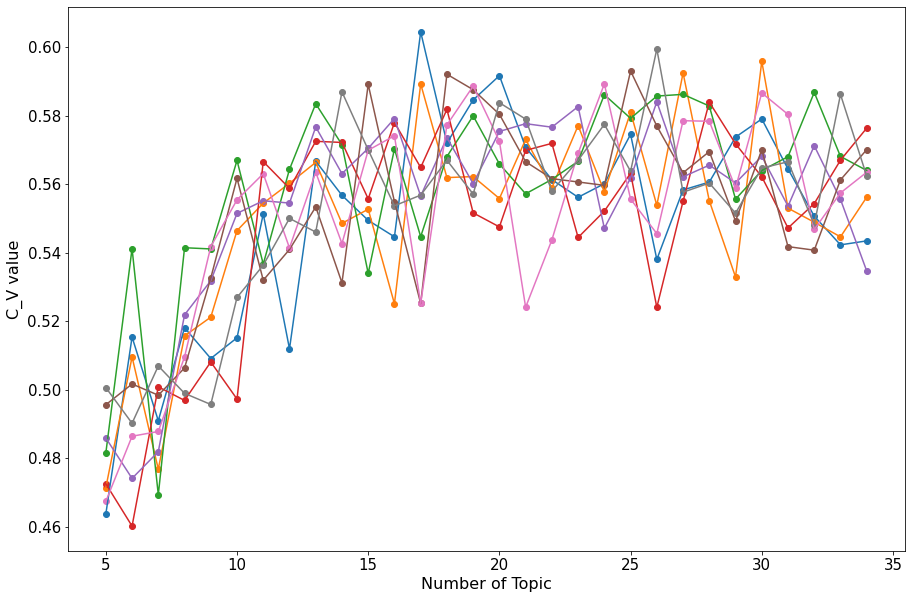

In [13]:
def topicSelectionPlot(docNumber = [26, 80, 189, 204, 238, 239, 254, 257]):
    fig, ax = plt.subplots(figsize=(15, 10))
    for elem in docNumber:
        grid = pd.read_csv("../Results/topicCVs_{}.csv".format(elem))
        ax.plot(grid.num_topics, grid.c_v)
        ax.scatter(grid.num_topics, grid.c_v)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_xlabel('Number of Topic', fontsize=16)
    ax.set_ylabel("C_V value", fontsize=16)

In [ ]:
def avgTopicSelectionPlot(docNumber = [26, 80, 189, 204, 238, 239, 254, 257]):
    CVs = np.array([0] * 30)
    for elem in docNumber:
        grid = pd.read_csv("../Results/topicCVs_{}.csv".format(elem))
        CVs = CVs + np.array(grid.c_v)
    Avg_CVs = CVs / np.array([len(docNumber)] * 30)
    plt.figure(figsize=(15, 10))
    plt.plot(range(5,35), Avg_CVs)
    plt.scatter(range(5,35), Avg_CVs)
    plt.tick_params(axis='both', labelsize=15)
    plt.xlabel('Number of Topic', fontsize = 16)
    plt.ylabel('C_V value', fontsize = 16)
    plt.title('Total Probability of Top 10 Words in each Topic', fontsize = 16)